In [5]:
from dotenv import load_dotenv
import os
load_dotenv()


True

In [6]:
from langchain_google_genai import GoogleGenerativeAI
from langchain_google_genai import ChatGoogleGenerativeAI


In [7]:
chat_llm = GoogleGenerativeAI(model="gemini-3-flash-preview") 

In [8]:
chat_llm.invoke("What is the capital of France?")

'The capital of France is **Paris**.'

In [9]:
from typing_extensions import Annotated, NotRequired, TypedDict
import operator

In [10]:
from langchain_core.messages import AnyMessage,HumanMessage,AIMessage

In [11]:
class GraphState(TypedDict):
    messages: Annotated[list[AnyMessage],operator.add]

In [12]:
def llm_call(state:GraphState)->dict:
    """call the llm with the messages in the state and return the response as a new message"""
    response = chat_llm.invoke(state["messages"])
    return{
        "messages": [response]
    }

In [13]:
def token_counter(state: GraphState) -> dict:
    last_message = state["messages"][-1]

    # Handle both string and message object
    if hasattr(last_message, "content"):
        text = last_message.content
    else:
        text = str(last_message)

    tokens = len(text.split())
    summary = f"Total token number in the generated answer (word count) is {tokens}"

    return {"token_summary": summary}


In [14]:
from langgraph.graph import StateGraph

In [15]:
builder = StateGraph(GraphState)

In [16]:
builder.add_node('llm_call', llm_call)
builder.add_node('token_counter', token_counter)



In [17]:
builder.set_entry_point('llm_call')
builder.add_edge('llm_call', 'token_counter')
builder.set_finish_point('token_counter')



In [18]:
app=builder.compile()

In [19]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'llm_call': Node(id='llm_call', name='llm_call', data=llm_call(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'token_counter': Node(id='token_counter', name='token_counter', data=token_counter(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='llm_call', data=None, conditional=False), Edge(source='llm_call', target='token_counter', data=None, conditional=False), Edge(source='token_counter', target='__end__', data=None, conditional=False)])

In [20]:
from IPython.display import Image,display

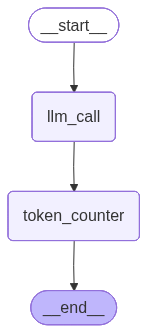

In [21]:
display(Image(app.get_graph().draw_mermaid_png()))


In [22]:
result = app.invoke({
    "messages":[HumanMessage(content="Tell about the TVK Party?")]
    })

In [23]:
result

{'messages': [HumanMessage(content='Tell about the TVK Party?', additional_kwargs={}, response_metadata={}),
  'The **Tamilaga Vettri Kazhagam (TVK)**, which translates to "Tamil Nadu Victory Federation," is a prominent new political party in the Indian state of Tamil Nadu. It was founded by the hugely popular Tamil cinema superstar **Vijay** (often referred to by fans as "Thalapathy").\n\nHere is a comprehensive overview of the party, its ideology, and its goals:\n\n### 1. Formation and Launch\n*   **Founder:** Vijay officially announced the formation of the party on **February 2, 2024**.\n*   **Transition from Cinema:** Vijay is one of the highest-paid actors in India. He has stated that he will quit acting after completing his current film commitments (specifically after his 69th film) to become a full-time politician.\n*   **Political Entry:** While many Tamil actors have entered politics (like MGR, Jayalalithaa, and Kamal Haasan), Vijay’s entry is seen as particularly significant 

In [24]:
for e in result["messages"]:
    if hasattr(e, "content"):
        print(type(e).__name__, ":", e.content)
    else:
        print(type(e).__name__, ":", str(e))


HumanMessage : Tell about the TVK Party?
str : The **Tamilaga Vettri Kazhagam (TVK)**, which translates to "Tamil Nadu Victory Federation," is a prominent new political party in the Indian state of Tamil Nadu. It was founded by the hugely popular Tamil cinema superstar **Vijay** (often referred to by fans as "Thalapathy").

Here is a comprehensive overview of the party, its ideology, and its goals:

### 1. Formation and Launch
*   **Founder:** Vijay officially announced the formation of the party on **February 2, 2024**.
*   **Transition from Cinema:** Vijay is one of the highest-paid actors in India. He has stated that he will quit acting after completing his current film commitments (specifically after his 69th film) to become a full-time politician.
*   **Political Entry:** While many Tamil actors have entered politics (like MGR, Jayalalithaa, and Kamal Haasan), Vijay’s entry is seen as particularly significant due to his massive youth following.

### 2. Ideology and Principles
The 

In [25]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper


In [26]:
api_wrapper = WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max=500)


In [27]:
wiki_tool = WikipediaQueryRun(api_wrapper=api_wrapper)

In [28]:
wiki_tool.run({"query":"TVK Party"})

d:\AI-Agent\env\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file d:\AI-Agent\env\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


'Page: Tamilaga Vettri Kazhagam\nSummary: Tamilaga Vettri Kazhagam (transl.\u2009Victory Party of Tamilakam; abbr. TVK) is an Indian regional political party active in the union territory of Puducherry and the state of Tamil Nadu. It was founded on 2 February 2024 by actor-turned-politician Vijay, who became its first president. The party is headquartered in Panaiyur, Chennai.\n\nPage: 2026 Tamil Nadu Legislative Assembly election\nSummary: Legislative Assembly elections are expected to be held in Tamil N'

In [29]:
import os 
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")

In [30]:
TAVILY_API_KEY

'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'

In [31]:
tool =TavilySearchResults(tavily_api_key=TAVILY_API_KEY)


C:\Users\sanja\AppData\Local\Temp\ipykernel_20620\3038890536.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tool =TavilySearchResults(tavily_api_key=TAVILY_API_KEY)


In [32]:
tool.run({"query":"Will Tvk win the next election?"})

[{'title': "Thalapathy Vijay's TVK To Win 180 Seats? What's Happening?",
  'url': 'https://english.tupaki.com/latest-news/tvk-bold-claim-thalapathy-vijay-175-180-seats-2026-1474684',
  'content': 'Social media posts and have been circulating this week claiming that TVK will win between 175 and 180 of the 234 seats, quoting close party leader Bussy Anand making the prediction. Anand is a close friend of Vijay and he has a tall prediction on the coming elections.\n\nThese posts have gained traction among supporters and followers online, though major news outlets have not independently verified this exact seat estimate from a formal TVK press statement.\n\nTVK has been actively preparing for the election campaign. Recently the party formalised its organisational structure by appointing a team of election observers under senior leaders like N Anand and K A Sengottaiyan to oversee poll work across Tamil Nadu and neighbouring Puducherry. [...] Begin typing your search above and press return 

In [33]:
from langchain_community.tools import DuckDuckGoSearchResults
duck_tool = DuckDuckGoSearchResults()

In [34]:
duck_tool.run({"query":"Who is the Ajith kumar racing owner?"})

Impersonate 'chrome_126' does not exist, using 'random'


"snippet: 12 Feb 2026 · Ajith Kumar Subramaniam (born 1 May 1971) is an Indian actor who works predominantly in Tamil cinema. To date, he has starred in over 63 films, and won four ..., title: Ajith Kumar - Wikipedia, link: https://en.wikipedia.org/wiki/Ajith_Kumar, snippet: 19 May 2025 · From Thala to a racing pioneer, Ajith Kumar's journey is nothing short of inspiring. His passion for motorsports truly comes alive as we spend an exclusive ..., title: EXCLUSIVE Weekend with Ajith Kumar Racing - YouTube, link: https://www.youtube.com/watch?v=wGhl5RDapI0, snippet: 4 Jun 2025 · For the unaware, Ajith is not only racing but is also the owner of the team Ajith Kumar Racing. Ajith's other teammates who participate with him in races are ..., title: Ajith Kumar brings home McLaren Senna in tribute to his racing idol, link: https://timesofindia.indiatimes.com/entertainment/tamil/movies/news/senna-lives-on-ajith-kumar-brings-home-mclaren-senna-in-tribute-to-his-racing-idol/articleshow/12162334

In [35]:
from langchain_community.tools import YouTubeSearchTool
youtube_tool = YouTubeSearchTool()

In [36]:
youtube_tool.name

'youtube_search'

In [37]:
youtube_tool.run('kaber songs')

"['https://www.youtube.com/watch?v=_QBdTIT8Lek&list=RD_QBdTIT8Lek&start_radio=1&pp=ygULa2FiZXIgc29uZ3OgBwE%3D', 'https://www.youtube.com/watch?v=3JTJDbWUHks&list=RD3JTJDbWUHks&start_radio=1&pp=ygULa2FiZXIgc29uZ3OgBwE%3D']"

In [38]:
from langchain_community.tools import tool


In [39]:
@tool
def addition(a:int,b:int)->int:
    '''This tool adds two numbers together.'''
    return a+b 

In [40]:
addition.invoke({"a":5,"b":10})

15

In [41]:
@tool 
def find_length(text:str)->int:
    '''This tool finds the length of the given text.'''
    return len(text)

In [42]:
find_length.invoke({"text":"Hello, how are you?"})

19

In [43]:
import yfinance as yf

@tool
def get_stock_price(ticker:str) -> str: 
    """this is a tool to get stock price using yfinance"""
    try:
        stock = yf.Ticker(ticker)

        # Get last 1 day historical data
        data = stock.history(period="1d")

        if data.empty:
            return f"No data found for ticker '{ticker}'. Please check the symbol."

        latest_close = data["Close"].iloc[-1]

        # Detect currency
        currency = stock.info.get("currency", "")
        symbol_map = {
            "INR": "₹",
            "USD": "$",
            "EUR": "€",
            "GBP": "£"
        }

        symbol = symbol_map.get(currency, "")
        currency_text = currency if currency else ""

        if symbol:
            return f"The last closing price of {ticker.upper()} was {symbol}{latest_close:.2f}."
        else:
            return f"The last closing price of {ticker.upper()} was {latest_close:.2f} {currency_text}."

    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"


In [44]:
get_stock_price.invoke("TCS.NS")

'The last closing price of TCS.NS was ₹2648.40.'

In [45]:
get_stock_price.invoke("IOC.NS")

'The last closing price of IOC.NS was ₹186.21.'

In [46]:
[get_stock_price, find_length, addition]

[StructuredTool(name='get_stock_price', description='this is a tool to get stock price using yfinance', args_schema=<class 'langchain_core.utils.pydantic.get_stock_price'>, func=<function get_stock_price at 0x000001F9E49F7F60>),
 StructuredTool(name='find_length', description='This tool finds the length of the given text.', args_schema=<class 'langchain_core.utils.pydantic.find_length'>, func=<function find_length at 0x000001F9E49F6F20>),
 StructuredTool(name='addition', description='This tool adds two numbers together.', args_schema=<class 'langchain_core.utils.pydantic.addition'>, func=<function addition at 0x000001F9E49F6E80>)]

In [47]:
tools = [get_stock_price, find_length, addition,duck_tool,youtube_tool]

In [48]:
llm = ChatGoogleGenerativeAI(model="gemini-3-flash-preview")

In [49]:
llm_with_tools = llm.bind_tools(tools)


In [53]:
result=llm_with_tools.invoke("What is the stock price of IOC.NS? ")

In [54]:
result

AIMessage(content=[], additional_kwargs={'function_call': {'name': 'get_stock_price', 'arguments': '{"ticker": "IOC.NS"}'}, '__gemini_function_call_thought_signatures__': {'884622d4-b192-486e-890b-3cf7208f039f': 'EoADCv0CAb4+9vsMeOfe/V7fizd6BgRRiv28FdAfAzMHo5VPFmN9opIZXn9t/1iLi92e+n3OmRZ+4JHOfzGuI5PyiMlHURE9+FIFqko1dL3m3LFSK5kFNvJjeTcw49TGLRwj+U2+FSuv93bnFpt/P1RcDg6b0tnNuPJUx7ci7RyXk0gJshB5s7JmT3tOpO9H2/p+/qMVT/BV2YUr0znRlr+OeW9848QEWk5v8NA/7pYNn75Up3RoKRpM85njzwwljS5TRkdx40ZlmpCNpB4a85u6PX3Z2RC36nX9Gmc4QVHjKxiZAK6i2NS6lteEn2G3L7BdUYmFO5RVcDtEqNsh/oIrtQ16X3vJGDYueu7q4mH4j5sGJtr7eT/6r/u2kZ+XYaqJvmW18/O1K7yUc/NYyvY+uo4iCSad4zaTbMbHdTofpfPH/ms1YvJXmrkg1NUi0nPJRhuXEUcCPePr9PR5cCXt0ERTFxXeR8rLPpRfz3yjUF3tIKcrOjxn27Qj6+z7TJyS'}}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-3-flash-preview', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c9958-c288-7592-ac36-34d20a202ccb-0', tool_calls=[{'name': 'get_stock_price', 'args': {'ticker': 'IOC.NS'}, 'i

In [56]:
result.content

[]

In [ ]:
#this will show the which tool was called and with what parameters
result.tool_calls


[{'name': 'get_stock_price',
  'args': {'ticker': 'IOC.NS'},
  'id': '884622d4-b192-486e-890b-3cf7208f039f',
  'type': 'tool_call'}]

In [ ]:
result=llm_with_tools.invoke("hi,how are you?")

AIMessage(content=[{'type': 'text', 'text': "I'm doing well, thank you for asking! How can I help you today?", 'extras': {'signature': 'EuABCt0BAb4+9vuqAO722p9XRPFt37mULnFMnLTAVeX5utpnUvFkpOikhSPWFDQGzr/R4cGI7PsDDrPJKnPoZdBcFvutZ49e8+U8FuuxfiTdihvTh4dpJ7ADyZnvJLv63qNw+wriSSvhsVipo0Poxr2wHEIPqJy0/rvclFK4evs/THw19YWEQYQzZ4EWtkGFFQN/M7qyKHyZIZBGnUN7rUNOOLE1VHreJDaXVqnw82ou+Kb33iNMcEv2kKg0SegTvB/X5SALlcMS8ix079A0Vx7CoVl7YGV75OTk3gD4Td6QFMY='}}], additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-3-flash-preview', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c995c-b791-7513-ba16-1db35208ecd5-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 326, 'output_tokens': 62, 'total_tokens': 388, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 44}})

In [58]:
result.content

[]

In [61]:
result = llm_with_tools.invoke("What is the upcoming movies of vijay?")

In [62]:
result.content

[]

In [60]:
result.tool_calls

[{'name': 'duckduckgo_results_json',
  'args': {'query': 'upcoming movies of Thalapathy Vijay'},
  'id': '84e40416-ee71-457f-8725-3e9451756c13',
  'type': 'tool_call'}]

In [84]:
from langchain_core.messages import HumanMessage,SystemMessage
from langgraph.graph import StateGraph,MessagesState,END,START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


In [85]:
SYSTEM_PROMPT = SystemMessage(content="you are a helpful assistant that can answer questions about the user's code and provide guidance on best practices.")

In [87]:
def function_1(state:MessagesState):
    user_question = state["messages"]
    input_question = [SYSTEM_PROMPT]+user_question
    response = llm_with_tools.invoke(input_question)
    return {
        "messages": [response]
    }

In [88]:
tools

[StructuredTool(name='get_stock_price', description='this is a tool to get stock price using yfinance', args_schema=<class 'langchain_core.utils.pydantic.get_stock_price'>, func=<function get_stock_price at 0x000001F9E49F7F60>),
 StructuredTool(name='find_length', description='This tool finds the length of the given text.', args_schema=<class 'langchain_core.utils.pydantic.find_length'>, func=<function find_length at 0x000001F9E49F6F20>),
 StructuredTool(name='addition', description='This tool adds two numbers together.', args_schema=<class 'langchain_core.utils.pydantic.addition'>, func=<function addition at 0x000001F9E49F6E80>),
 DuckDuckGoSearchResults(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text')),
 YouTubeSearchTool()]

In [89]:
function_2 = ToolNode(tools)

In [90]:
workflow = StateGraph(MessagesState)

In [91]:
workflow.add_node("llm",function_1)

In [92]:
workflow.add_node('tools',function_2)

In [93]:
workflow.add_edge(START,"llm")

In [94]:
workflow.add_conditional_edges(
    "llm",
    tools_condition,
)

In [95]:
workflow.add_edge("tools","llm")

In [96]:
app = workflow.compile()


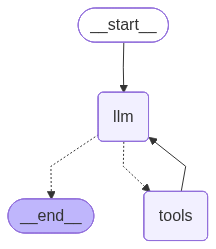

In [97]:
from IPython.display import Image,display
display(Image(app.get_graph(xray=True).draw_mermaid_png()))

In [98]:
result = app.invoke({
    "messages":[HumanMessage(content="What is the stock price of IOC.NS?")]
})

In [99]:
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the stock price of IOC.NS?
================================== Ai Message ==================================

[]
Tool Calls:
  get_stock_price (1c78c056-d47e-486b-96e4-ff9b795881d0)
 Call ID: 1c78c056-d47e-486b-96e4-ff9b795881d0
  Args:
    ticker: IOC.NS
================================= Tool Message =================================
Name: get_stock_price

The last closing price of IOC.NS was ₹186.47.
================================== Ai Message ==================================

[{'type': 'text', 'text': 'The last closing price of IOC.NS was ₹186.47.'}]


In [ ]:
for m in result['messages']:
    m.pretty_print()